In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from numpy.linalg import svd
from sklearn.decomposition import PCA
import seaborn as sns
dataset = pd.read_csv("heart.csv")

In [5]:
#a)Apply a filter to select rows based on a specific condition of your choice (e.g., select records wherea value exceeds a certain threshold)
filtered_df = dataset[dataset["Cholesterol"] > 200]  # select rows where cholesterol > 200
print(filtered_df)

     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
5     39   M           NAP        120          339          0     Normal   
6     45   F           ATA        130          237          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
905   67   M           NAP        152          212          0        LVH   
906   55   F           ATA        132          342          0     Normal   
912   57   F           ASY        140          241          0     Normal   
913   45   M            TA        110          264          0     Normal   
916   57   F           ATA        130          236          0        LVH   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N  

In [6]:
#b) Identify records where a chosen attribute starts with a specific letter ('F') and count how many records match this condition.
dataset[dataset['Sex'].str.startswith('F')]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0
10,37,F,NAP,130,211,0,Normal,142,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
901,58,F,ASY,170,225,1,LVH,146,Y,2.8,Flat,1
906,55,F,ATA,132,342,0,Normal,166,N,1.2,Up,0
909,63,F,ASY,124,197,0,Normal,136,Y,0.0,Flat,1
912,57,F,ASY,140,241,0,Normal,123,Y,0.2,Flat,1


In [7]:
#c) Determine the total number of duplicate rows and remove them if found.
duplicates = dataset.duplicated().sum() #count duplicate rows
print(f"Number of duplicate rows: {duplicates}") #print duplicate rows
cleanup = dataset.drop_duplicates(inplace = True) #remove duplicates found
print(f"After dropping duplicate rows: {cleanup}") #want to recheck this part

Number of duplicate rows: 0
After dropping duplicate rows: None


In [8]:
#d) Convert the data type of a numerical column from integer to string.
dataset['MaxHR'] = dataset['MaxHR'].astype(str)

In [9]:
#e) Group the dataset based on two selected categorical features and analyze the results.
grouped = dataset.groupby(["ExerciseAngina", "HeartDisease"]).size()
#group based on two categorical features
print(grouped)

ExerciseAngina  HeartDisease
N               0               355
                1               192
Y               0                55
                1               316
dtype: int64


In [10]:
#f) Check for the existence of missing values within the dataset
print(dataset.isnull().sum()) #Check for missing values

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [11]:
#g) If any missing values are found, replace them with the median or mode as appropriate
missing = dataset.isnull().sum() #seeing what values are missing
print(f"Missing values: {missing}")
for column in dataset.columns: #loop to replace the missing values if there is any
    if dataset[column].isnull().any(): #checks if any column is missing
        if dataset[column].dtype == object: #checks if it's a categorical value or nah
            dataset[column].fillna(dataset[column].mode()[0], inplace = True) #if categorical replace with mode
        else:
            dataset[column].fillna(dataset[column].median(), inplace = True) #if numerical replace with median
print(f"The replacements: {dataset.isnull().sum()}")

Missing values: Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64
The replacements: Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [12]:
#h) Divide a chosen numerical column into 5 equal-width bins and count the number of records in each bin
chosen_numerical = 'Cholesterol'
dataset["5 equal-width binned: "] = pd.cut(dataset[chosen_numerical], bins = 5, labels = False, include_lowest = True) #to create 5 equal-width bins
counts = dataset["5 equal-width binned: "].value_counts() #counting the number of records in each bin
print(counts)

5 equal-width binned: 
1    389
2    329
0    178
3     17
4      5
Name: count, dtype: int64


In [13]:
#i) Identify and print the row corresponding to the maximum value of a selected numerical feature **
max_row = dataset.loc[dataset['MaxHR'].idxmax()]  #find the row of the maximum hr
print(max_row) #print it lol

Age                         58
Sex                          M
ChestPainType              ATA
RestingBP                  136
Cholesterol                164
FastingBS                    0
RestingECG                  ST
MaxHR                       99
ExerciseAngina               Y
Oldpeak                    2.0
ST_Slope                  Flat
HeartDisease                 1
5 equal-width binned:        1
Name: 11, dtype: object


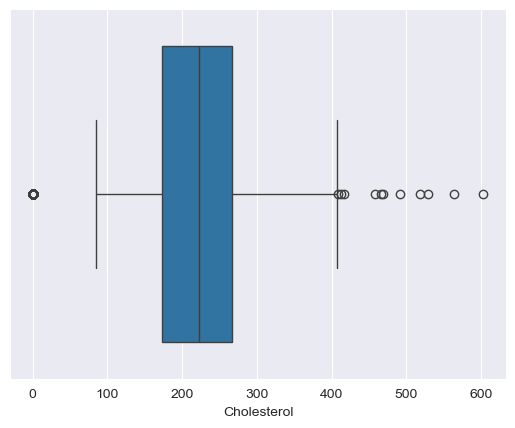

In [14]:
#j) Construct a boxplot for an attribute you consider significant and justify the selection.
sns.boxplot(x=dataset["Cholesterol"])
plt.show()


Text(0.5, 1.0, 'Histogram')

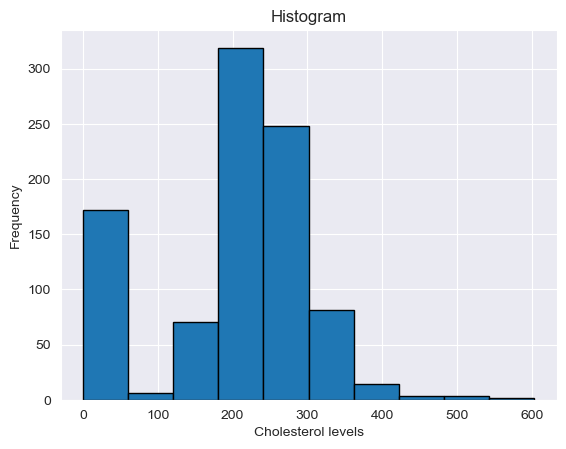

In [15]:
#k) Generate a histogram for a chosen attribute and provide an explanation for its relevance. **
plt.hist(dataset['Cholesterol'], bins=10, edgecolor='black')
plt.xlabel('Cholesterol levels')
plt.ylabel('Frequency')
plt.title('Histogram')

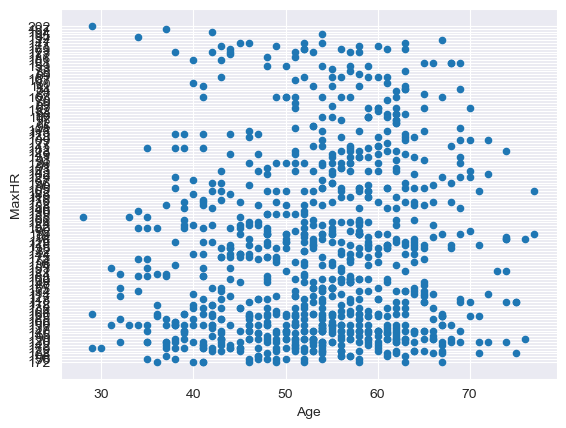

"For interpreting the data I'd say starting from end 20s to early 30s\nthe heart rate levels are pretty high/above normal range and as\nthe age gets higher the we see that there we have more people in a normal/lower\nheart range area, of course with variations. So younger = higher heart rate\nand older = lower heart rate."

In [16]:
#L) Create a scatterplot using two attributes and interpret the relationship observed.
dataset.plot(kind = 'scatter', x = 'Age', y = 'MaxHR')
#keyword "kind" specifies type of chart we want, and it takes 2 attributes "x" and "y"
plt.show() #this outputs the scatterplot
"""For interpreting the data I'd say starting from end 20s to early 30s
the heart rate levels are pretty high/above normal range and as
the age gets higher the we see that there we have more people in a normal/lower
heart range area, of course with variations. So younger = higher heart rate
and older = lower heart rate."""

In [17]:
#m) Normalize the numerical attributes using StandardScaler to achieve standardized data
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(dataset.select_dtypes(include=["float64", "int64"])), columns=dataset.select_dtypes(include=["float64", "int64"]).columns)
print(df_scaled)

          Age  RestingBP  Cholesterol  FastingBS   Oldpeak  HeartDisease  \
0   -1.433140   0.410909     0.825070  -0.551341 -0.832432     -1.113115   
1   -0.478484   1.491752    -0.171961  -0.551341  0.105664      0.898380   
2   -1.751359  -0.129513     0.770188  -0.551341 -0.832432     -1.113115   
3   -0.584556   0.302825     0.139040  -0.551341  0.574711      0.898380   
4    0.051881   0.951331    -0.034755  -0.551341 -0.832432     -1.113115   
..        ...        ...          ...        ...       ...           ...   
913 -0.902775  -1.210356     0.596393  -0.551341  0.293283      0.898380   
914  1.536902   0.627078    -0.053049   1.813758  2.357094      0.898380   
915  0.370100  -0.129513    -0.620168  -0.551341  0.293283      0.898380   
916  0.370100  -0.129513     0.340275  -0.551341 -0.832432      0.898380   
917 -1.645286   0.302825    -0.217696  -0.551341 -0.832432     -1.113115   

     5 equal-width binned:   
0                  0.987031  
1                 -0.274939

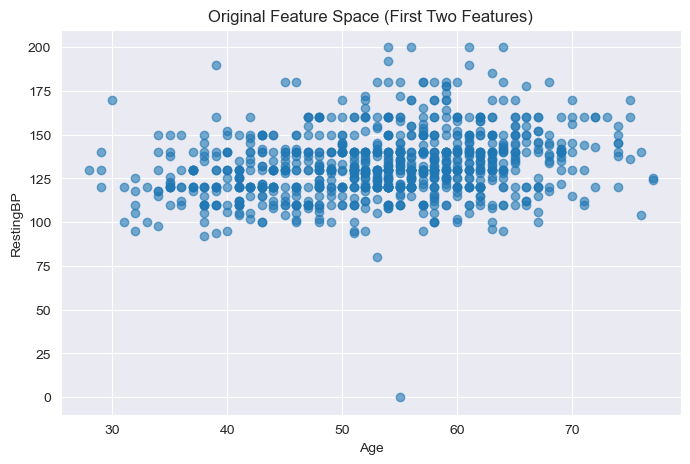

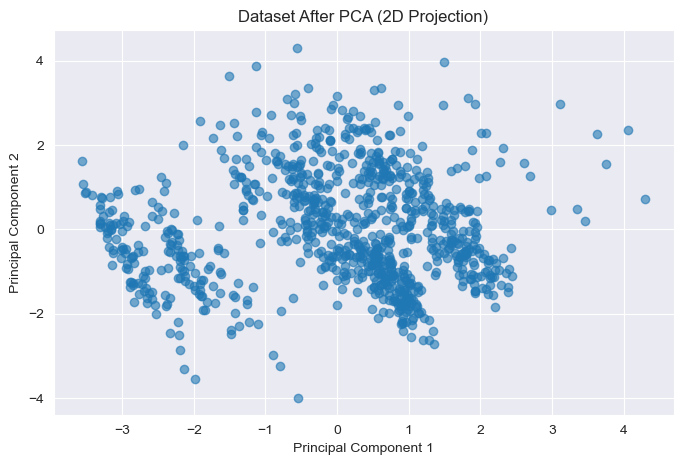

In [18]:
#n) Perform PCA (Principal Component Analysis) to reduce dimensionality to two components, and visualize the dataset before and after applying PCA.
#man 🙏 this sucks
dataset = pd.get_dummies(dataset, drop_first=True)
features = dataset.drop(columns=['target'], errors='ignore').select_dtypes(include=[np.number])  # Convert to numpy array and drop target column if it exists
#target column is the column we may be trying to predict
#we dont want PCA to have an influence on the prediction (i think lmao)
#features is the rest of the columns we need

#---------------------------PCA STEPS----------------------------------------

#step 1 : standarize data so that it is all scaled the same, no one column has more weight than another

scaler = StandardScaler() #makes everything have a mean of 0 and a spread of 1
features_scaled = scaler.fit_transform(features)  #new standarized variables

#step 2 : shrink data to 2 components and apply PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(features_scaled)  #new shrunken version of our data

#step 3 : table wooooo

pca_df = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])
#PC1 and PC2 are our patterns

#step 4 : add back target :( [i dont think we even needed to remove a target in the first place]

if 'target' in dataset.columns:
    pca_df['target'] = dataset['target']

#step 5 : visualize data before PCA
plt.figure(figsize=(8, 5))
plt.scatter(features.iloc[:, 0], features.iloc[:, 1], alpha=0.6)
plt.xlabel(features.columns[0])
plt.ylabel(features.columns[1])
plt.title('Original Feature Space (First Two Features)')
plt.show()

#STEP 6 : data after pca
plt.figure(figsize=(8, 5))

if 'target' in dataset.columns:  #if theres target add it back and color it (idk lol )
    plt.scatter(pca_df['PC1'], pca_df['PC2'], c=dataset['target'], cmap='viridis', alpha=0.6)
    plt.colorbar(label="Target")
else:
    plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.6)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Dataset After PCA (2D Projection)')
plt.show()

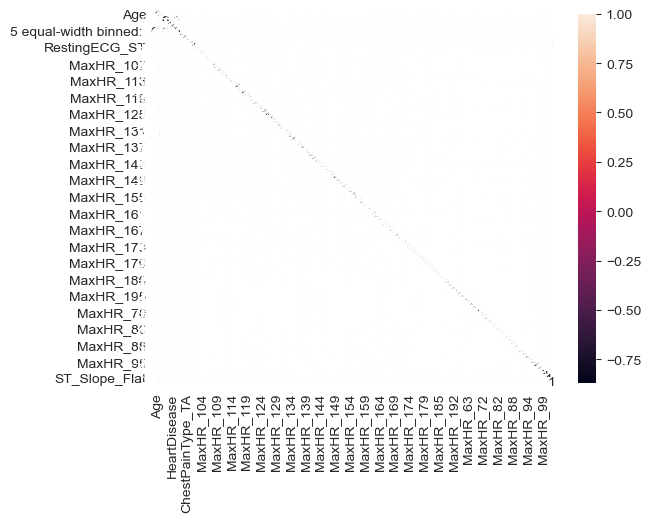

"Analysis of the data would be:\n    - MaxHR & Age: as the age goes up, the heartrate goes down (-0.38)\n    - MaxHR & Heart Disease: higher heartrate = lower chances of a heart disease (-0.4)\n    - Oldpeak (ST depression) & Heart disease: higher oldpeak = higher risk of a heart disease (0.4)\n    - Age & Heart Disease: the older the higher the risk (0.28)\n    - FastingBS & Heart Disease: when the fasting blood sugar is high might be related to heart diseases (I'm not sure cause it's 0.27)\n    - Cholesterol & MaxHR: can't determine relation (0.24)\n    - RestingBP & Heart Disease: can't determine (almost no correlation since it's almost 0?) (0.11)\n    - Cholesterol & Heart Disease: not a good relationship, can't determine (-0.23)"

In [19]:
#O) Analyze the correlation between numerical features using a heatmap

corr = dataset.corr(numeric_only = True)
#corr() calculates the relationship between each column in your data & "numeric_only = true" is to make sure the
#catergorical attributes are excluded and only numerical is included
#plt.figure(figsize = (10,10)) #specifying how large (zoomed in/out) the heatmap should be
sns.heatmap(corr, annot = True) #creating the heatmap
plt.show()
#if it's 1 that means perfect correlation (1 to 1 relationship)
#0.9 is a good relationship, increase-increase
#-0.9 is also good BUT, increase-decrease
#0.2 is not a good relationship, increase-most likely won't
"""Analysis of the data would be:
    - MaxHR & Age: as the age goes up, the heartrate goes down (-0.38)
    - MaxHR & Heart Disease: higher heartrate = lower chances of a heart disease (-0.4)
    - Oldpeak (ST depression) & Heart disease: higher oldpeak = higher risk of a heart disease (0.4)
    - Age & Heart Disease: the older the higher the risk (0.28)
    - FastingBS & Heart Disease: when the fasting blood sugar is high might be related to heart diseases (I'm not sure cause it's 0.27)
    - Cholesterol & MaxHR: can't determine relation (0.24)
    - RestingBP & Heart Disease: can't determine (almost no correlation since it's almost 0?) (0.11)
    - Cholesterol & Heart Disease: not a good relationship, can't determine (-0.23)"""